# Plotting

In [1]:
import numpy as np

In [2]:
# Loading solution
# Link: https://github.com/lululxvi/deepxde/issues/17
# In test.dat, the first column is x coordinate, the second column is y coordinate, the 3rd column is y_true, the 4th column is y_pred.

data = np.genfromtxt('test.dat')

In [3]:
x, y, z, y_pred = data[:,0], data[:,1], data[:,2], data[:,3]

In [4]:
# Loading exact results
exact_data = np.load('new_final_data.npz') # load true solution
keys = list(exact_data.keys()) # all keys in the dictionary
print(keys)

['nodes', 'temperature', 'boundary_nodal_coordinates', 'boundary_solution']


In [5]:
nodes = exact_data[keys[0]] # nodal coordinates
temperature = exact_data[keys[1]] # nodal temperature
nodes = nodes#[:,[0,2]]
print(np.shape(nodes))
print(np.shape(temperature))
print(np.shape(y_pred))

(34071, 3)
(34071, 1)
(25000,)


In [6]:
import matplotlib.pyplot as plt
from matplotlib import cm

/tmp/ipykernel_496730/1839753022.py:3: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("jet").copy()
  sc1.cmap.set_under('k')
/tmp/ipykernel_496730/1839753022.py:4: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("jet").copy()
  sc1.cmap.set_over('k')


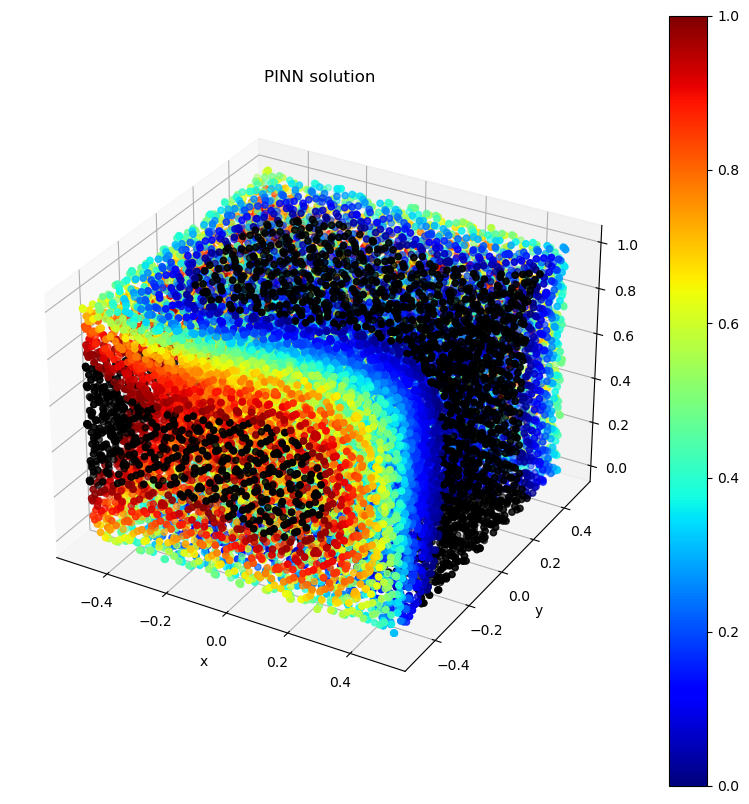

In [7]:
fig, ax = plt.subplots(1,figsize=(10,10), subplot_kw=dict(projection='3d'))
sc1 = ax.scatter(x,y,z, c = y_pred-1, cmap=cm.jet, vmin=0.0, vmax=1.0)
sc1.cmap.set_under('k')
sc1.cmap.set_over('k')
ax.set_title('PINN solution')
ax.set_aspect('auto', 'box')
ax.set(xlabel='x', ylabel='y')
fig.colorbar(sc1, ax=ax)
plt.savefig('Solution_with_bounds.jpg',bbox_inches = 'tight', pad_inches = 0.1, dpi = 300)

In [8]:
(1-min(y_pred)), (max(y_pred)-2)/2

(0.14549225568771362, 0.05079233646392822)

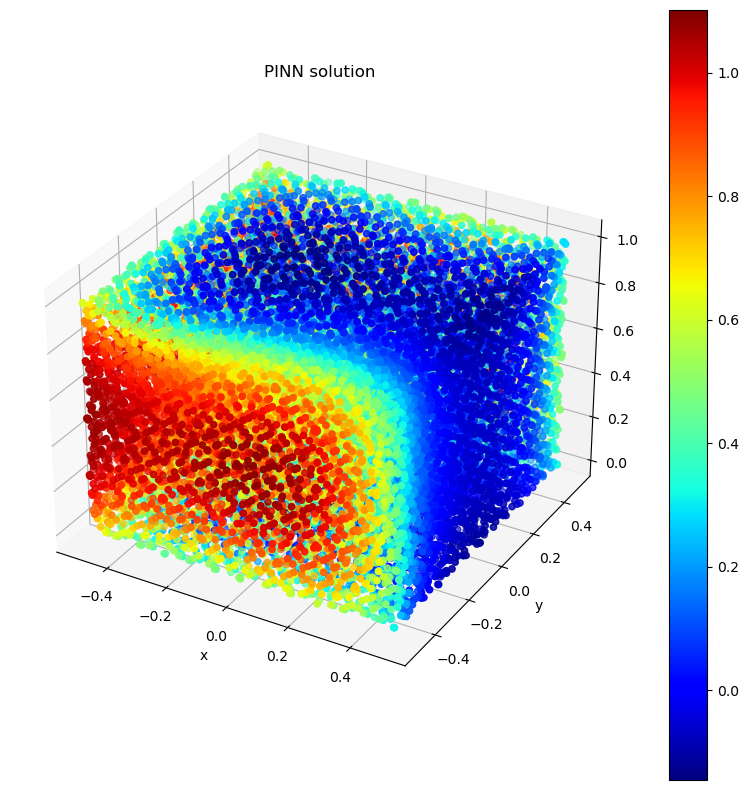

In [9]:
fig, ax = plt.subplots(1,figsize=(10,10), subplot_kw=dict(projection='3d'))
sc1 = ax.scatter(x,y,z, c = y_pred-1, cmap=cm.jet)#, vmin=1.0, vmax=2.0)
#sc1.cmap.set_under('k')
#sc1.cmap.set_over('k')
ax.set_title('PINN solution')
ax.set_aspect('auto', 'box')
ax.set(xlabel='x', ylabel='y')
fig.colorbar(sc1, ax=ax)
plt.savefig('Solution_without_bounds.jpg', dpi = 200)

In [10]:
#np.linalg.norm(y-temperature,2)

In [11]:
print(max(y_pred))
print(min(y_pred))

2.1015846729278564
0.8545077443122864


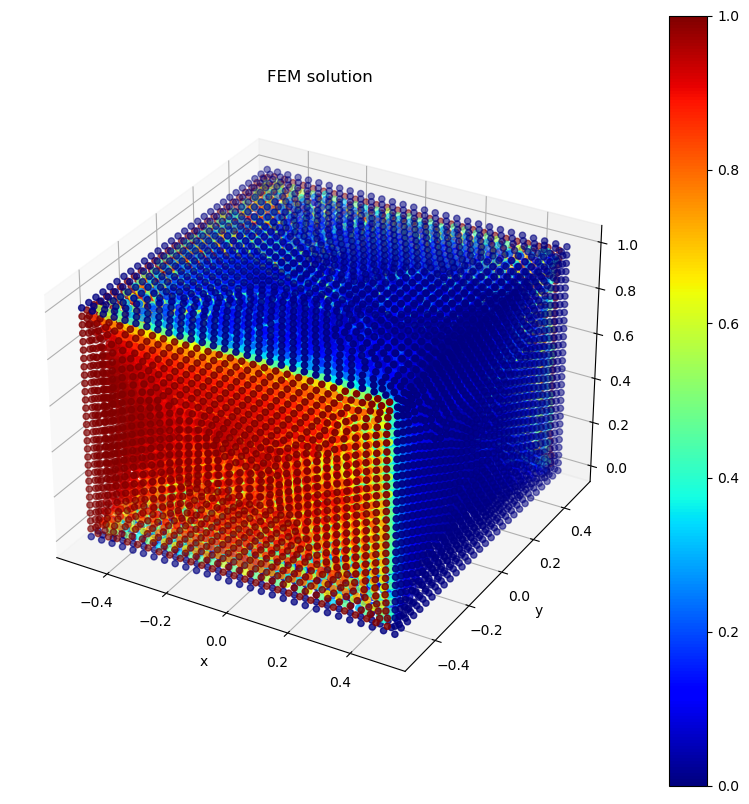

In [12]:
fig, ax = plt.subplots(1,figsize=(10,10),subplot_kw=dict(projection='3d'))
sc1 = ax.scatter(nodes[:,0], nodes[:,1], nodes[:,2], c = temperature/100-1, cmap=cm.jet)
#sc1.cmap.set_under('k')
#sc1.cmap.set_over('k')
ax.set_title('FEM solution')
ax.set_aspect('auto', 'box')
ax.set(xlabel='x', ylabel='y')
fig.colorbar(sc1, ax=ax)
plt.savefig('FEM solution.jpg',bbox_inches = 'tight', pad_inches = 0, dpi = 300)

In [13]:
loss_data = np.genfromtxt('loss.dat')
print(np.shape(loss_data))
# epochs
print(loss_data[:,0])

(16, 15)
[    0.  1000.  2000.  3000.  4000.  5000.  6000.  7000.  8000.  9000.
 10000. 11000. 12000. 13000. 14000. 15000.]


In [14]:
steps_number, BC1, BC2, BC3, BC4, BC5, BC6, loss_PDE = loss_data[:,0], loss_data[:,1], loss_data[:,2], loss_data[:,3], loss_data[:,4], loss_data[:,5], loss_data[:,6], loss_data[:,7]

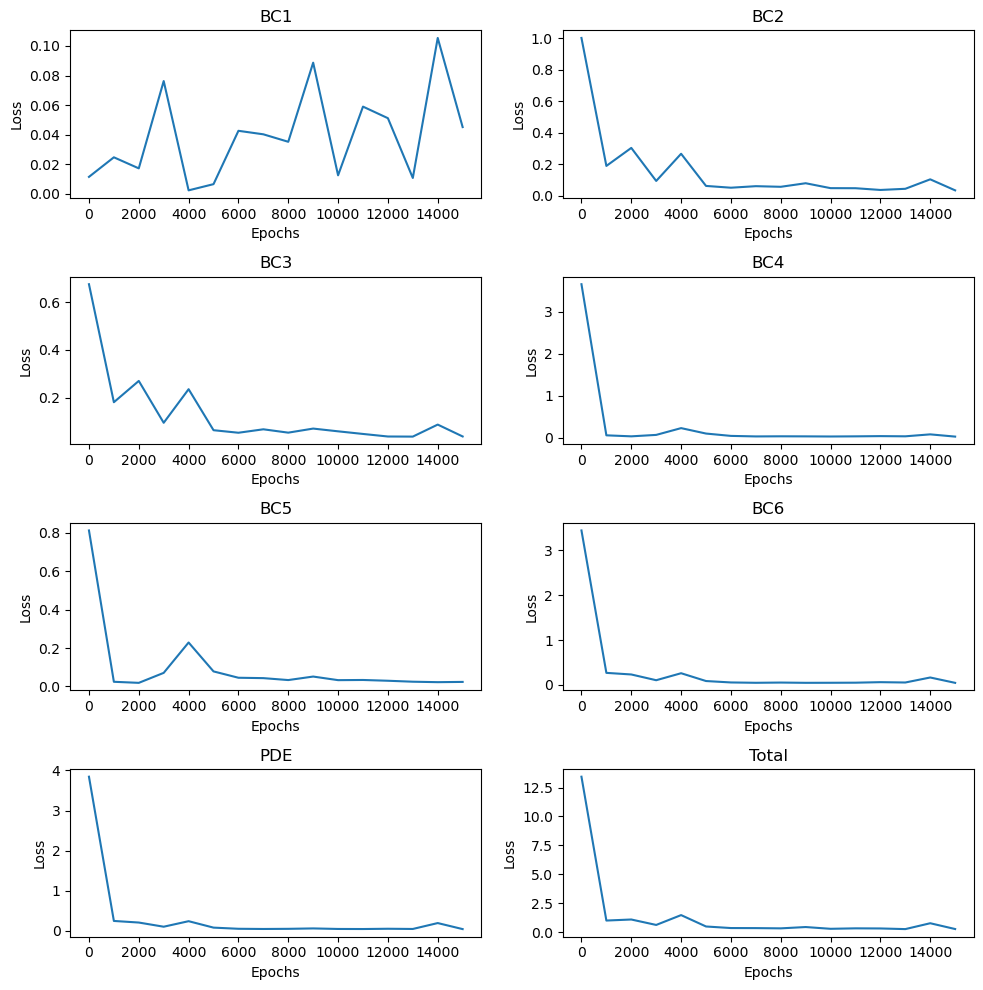

In [15]:
# Plot 6 BC_loss + PDE_loss and the total_loss = total 8 plots
fig, ax = plt.subplots(4,2,figsize=(10,10))
ax[0,0].plot(steps_number,BC1)
ax[0,0].set_title('BC1')
ax[0,1].plot(steps_number,BC2)
ax[0,1].set_title('BC2')
ax[1,0].plot(steps_number,BC3)
ax[1,0].set_title('BC3')
ax[1,1].plot(steps_number,BC4)
ax[1,1].set_title('BC4')
ax[2,0].plot(steps_number,BC5)
ax[2,0].set_title('BC5')
ax[2,1].plot(steps_number,BC6)
ax[2,1].set_title('BC6')
ax[3,0].plot(steps_number,loss_PDE)
ax[3,0].set_title('PDE')
ax[3,1].plot(steps_number,BC1+ BC2+ BC3+ BC4+ BC5+ BC6+ loss_PDE)
ax[3,1].set_title('Total')


#for axs in ax.flat:
for axs in ax.flat:
    axs.set(xlabel='Epochs', ylabel='Loss')

# Hide x labels and tick labels for top plots and y ticks for right plots.
#for axs in ax.flat:
#    axs.label_outer()
fig.tight_layout()
plt.savefig('losses.jpg',bbox_inches = 'tight', pad_inches = 0, dpi = 300)

In [16]:
# #from mpl_toolkits.mplot3d import Axes3D
# #from matplotlib import cm
# fig = plt.figure(figsize=(12,12))
# ax = fig.add_subplot(111)#, projection='3d')
# sc = ax.scatter(nodes[:,0], nodes[:,1], c = temperature, cmap=cm.jet)
# plt.colorbar(sc)
# plt.xlabel('x')
# plt.ylabel('y')
# #ax.set_zlabel('z')
# plt.title('Temperature distribution')
# plt.savefig('Exact.jpg', dpi = 200)

In [17]:
# Since the size of true values and predicted values are not same we will use RBF from scipy to calculate the absolute pointwise error
from scipy.interpolate import Rbf

In [18]:
# uncomment this to compute RBF. It takes long time
# rbfi = Rbf(nodes[:,0], nodes[:,1], nodes[:,2],temperature/100-1) # true solution interpolator
# temperature_di = rbfi(x, y, z) # 1d array: interpoalting to y_pred coordinates

In [19]:
# temperature_di.shape

In [20]:
# Since RBF interpolator takes long time I will save the varible in npy file
#np.savez('RBF_data.npy',temperature_di=temperature_di)

In [21]:
temperature_new = np.load('RBF_data.npy.npz')['temperature_di']

In [22]:
temperature_new.shape

(25000,)

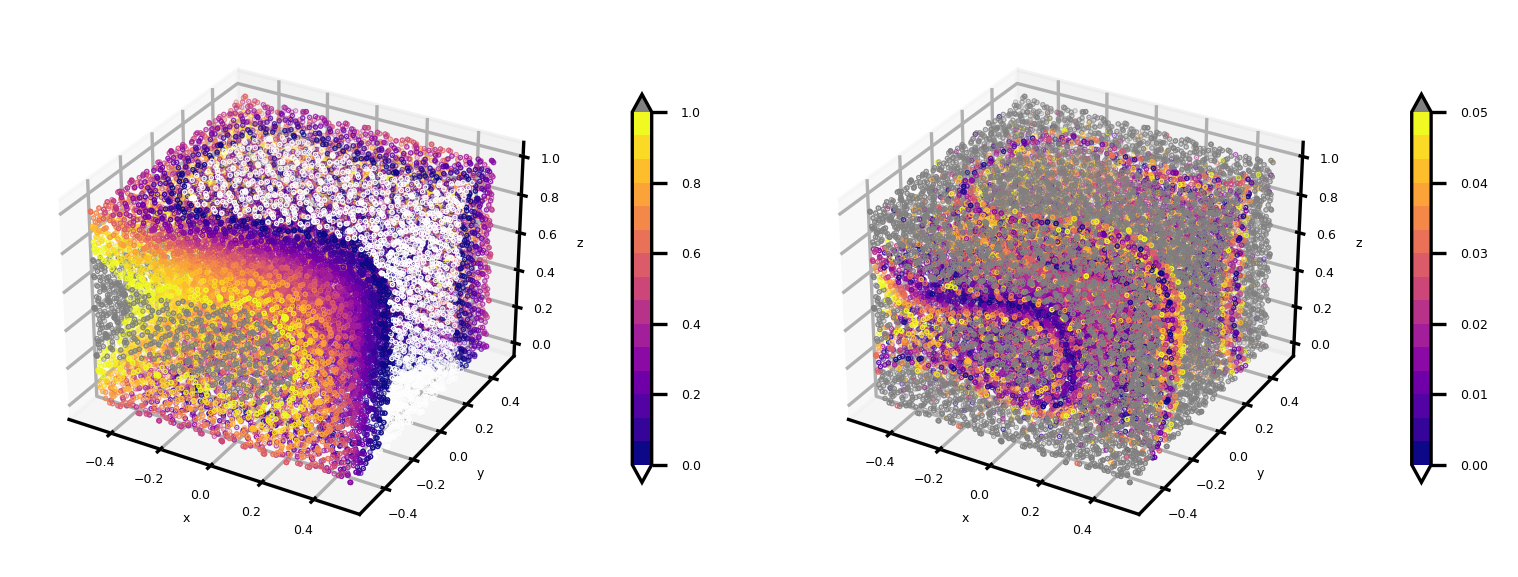

In [25]:
fig, ax = plt.subplots(1,2,dpi=300, subplot_kw=dict(projection='3d'))
sc = ax[0].scatter(x, y, z, c = y_pred-1, s = 0.1, cmap=plt.get_cmap('plasma', 15), vmin=0, vmax=1)
#sc = ax.scatter(nodes[:,0], nodes[:,1], c = best_u_pred, cmap=cm.jet, vmin=0, vmax=1)
sc1 = ax[1].scatter(x, y, z, c = abs(y_pred-1-temperature_new), s = 0.1, cmap=plt.get_cmap('plasma', 15), vmin=0, vmax=0.05)

sc.cmap.set_under('white')
sc.cmap.set_over('gray')
sc1.cmap.set_under('white')
sc1.cmap.set_over('gray')

#ax[0].set_title('(a)',fontsize=5)
#ax[1].set_title('(b)',fontsize=5)

# ax[0].set_xlabel('x',labelpad=0)
# ax[0].set_ylabel('y',labelpad=0)
# #ax.set_ylim([0, 1.0])
# ax[0].set_zlabel('z',labelpad=0)

# ax[1].set_xlabel('x',labelpad=0)
# ax[1].set_ylabel('y',labelpad=0)
# #ax.set_ylim([0, 1.0])
# ax[1].set_zlabel('z',labelpad=0)
# This one is better than tight_layout
# adjust width and height:https://stackoverflow.com/a/6541454/14598633
left  = 0.0  # the left side of the subplots of the figure
right = 0.9    # the right side of the subplots of the figure
bottom = 0.0   # the bottom of the subplots of the figure
top = 0.0      # the top of the subplots of the figure
wspace = 0.1   # the amount of width reserved for blank space between subplots
hspace = 0.0   # the amount of height reserved for white space between subplots

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=None)

for col in range(2):
    for row in range(1):
        # axes tick size(ticks are the numbers) and the padding from the axes
        ax[col].tick_params(axis='both', which='major', labelsize=3,pad=-4)
        # axes lebel size
        ax[col].xaxis.label.set_size(3)
        ax[col].yaxis.label.set_size(3)
        ax[col].zaxis.label.set_size(3)
        # axes label padding from the axes
        
        ax[col].set_xlabel('x',labelpad=-12)
        ax[col].set_ylabel('y',labelpad=-12)
        ax[col].set_zlabel('z',labelpad=-12)

        # colorbar size (shrink), padding from axes and ticks's labelsize
cbar1 = fig.colorbar(sc, ax=ax[0],shrink=0.35,pad=0.12, extend="both")
cbar1.ax.tick_params(labelsize=3) # colorbar label size
cbar2 = fig.colorbar(sc1, ax=ax[1],shrink=0.35, pad=0.12, extend="both")
cbar2.ax.tick_params(labelsize=3) # colorbar label size
# The ticks were far away from the axes
# ax[col].tick_params(axis='x', pad=-4,labelsize=3)
#fig.tight_layout()

    #tick.label1 = tick._get_text1()
#plt.title('Temperature distribution')
#plt.savefig('plots/Iteration_'+str(max_iter)+'_Best_PINN_predicted.jpg', dpi = 200)
#fig.supxlabel('(b) Model 2',y=0.25, fontsize=5)


#fig.tight_layout()
#ax.set_zlabel('z')
#plt.title('Temperature distribution')
plt.savefig('plots/solutions.jpg', dpi = 500,bbox_inches='tight',transparent=True)
# https://stackoverflow.com/a/63076575/14598633

In [24]:
rel_l2_norm_of_error = np.linalg.norm(abs(temperature_new-y_pred-1),2)/np.linalg.norm(temperature_new,2)
rel_l2_norm_of_error

3.155465647240293